In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('Training data.xlsx')

In [49]:
df.head(100)

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
95,yes,M,1,3,5,5,17,125,78.40
96,yes,F,1,2,3,6,17,125,76.09
97,yes,F,4,2,2,4,18,122,74.08
98,yes,M,3,1,4,4,19,91,55.33


In [50]:
x_train = np.array(df.iloc[:,0:8])
y_train = np.array(df.iloc[:,8]).reshape(-1,1)
print(x_train)
print(x_train[0:5,0])
print(x_train[1])

[['no' 'M' 2 ... 6 18 118]
 ['yes' 'M' 2 ... 7 19 107]
 ['yes' 'M' 3 ... 5 18 108]
 ...
 ['yes' 'M' 2 ... 5 17 123]
 ['yes' 'F' 1 ... 8 17 104]
 ['yes' 'M' 1 ... 6 18 128]]
['no' 'yes' 'yes' 'no' 'yes']
['yes' 'M' 2 2 2 7 19 107]


[[0 'M' 2 ... 6 18 118]
 [1 'M' 2 ... 7 19 107]
 [1 'M' 3 ... 5 18 108]
 ...
 [1 'M' 2 ... 5 17 123]
 [1 'F' 1 ... 8 17 104]
 [1 'M' 1 ... 6 18 128]]


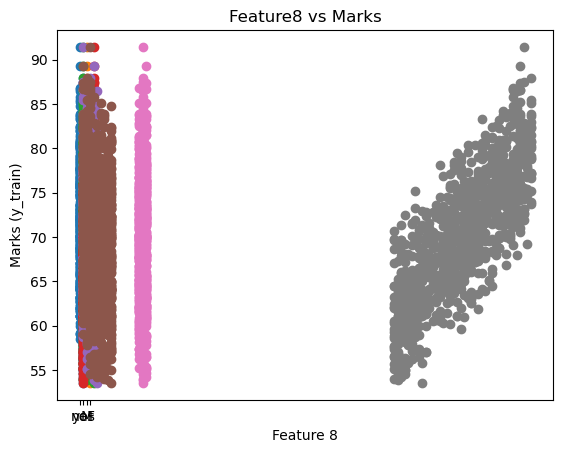

In [51]:
# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:,i],y_train)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel(f'Marks (y_train)')
    plt.title(f'Feature{i+1} vs Marks')
# Also do label encoding for features not represented in numbers
#Label encoding for Yes or No
x_train[:, 0] = np.where(x_train[:, 0] == 'yes', 1, 0)
# for i in range(x_train.shape[0]):
#     if x_train[i,0]=='no':
#         x_train[i,0] = 0
#     else:
#         x_train[i,0] = 1
print(x_train)

In [52]:
x_train[x_train == 'yes'] = 1
x_train[x_train == 'no'] = 0
x_train[x_train == 'M'] = 0
x_train[x_train == 'F'] = 1
print(x_train)

[[0 0 2 ... 6 18 118]
 [1 0 2 ... 7 19 107]
 [1 0 3 ... 5 18 108]
 ...
 [1 0 2 ... 5 17 123]
 [1 1 1 ... 8 17 104]
 [1 0 1 ... 6 18 128]]


In [53]:
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

# def feature_changing(x_train):
#   # ---------
#     # Your code here
#   # ---------
#   return x_train


In [54]:
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    x_train[x_train =='yes'] = 1
    x_train[x_train == 'no'] = 0
    x_train[x_train == 'M'] = 0
    x_train[x_train == 'F'] = 1
    return x_train
  # ---------
    # Your code here
  
  # ---------
x_train = feature_changing(x_train)

In [55]:
def z_score(x_train):
    x_mean = np.mean(x_train)
    x_std = np.std(x_train)
    x_train = (x_train - x_mean)/x_std
    return x_train,x_std,x_mean

In [56]:
def cost(x_train,y_train,w,b):
    n = len(x_train)
    loss = ((np.sum(((y_train) - (np.dot(x_train,w) + b))**2))/(2*n))
    return loss

In [57]:
def gradient_descent(x_train,y_train,w,b):
    n = len(y_train)
    alpha = 0.0001
    iterations = 1000
    
    for _ in range(iterations):
        y_pred = np.dot(x_train,w) + b
        dw = np.dot(x_train.T,(y_pred - y_train))
        db = np.sum(y_pred - y_train)
        w = w - alpha*(dw)
        b = b - alpha*db
        if (_%100 == 0):
            J = np.sum(((np.dot(x_train,w) + b ) - y_train)**2)/(2*n)
            print(f'Iteration{_} : Cost{J}')
    return w,b

In [58]:
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
print(x_predict)

[['yes' 'F' 1 ... 5 18 114]
 ['no' 'F' 3 ... 5 19 97]
 ['no' 'M' 2 ... 7 18 114]
 ...
 ['no' 'F' 1 ... 7 18 110]
 ['yes' 'F' 4 ... 5 18 114]
 ['yes' 'F' 2 ... 4 17 128]]


In [59]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

In [60]:
while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

Iteration0 : Cost36.61685707101321
Iteration100 : Cost9.139133094038069
Iteration200 : Cost8.73001314793872
Iteration300 : Cost8.431864687530783
Iteration400 : Cost8.20101919188384
Iteration500 : Cost8.01169804268453
Iteration600 : Cost7.848629552508123
Iteration700 : Cost7.702718047342604
Iteration800 : Cost7.5685027902157085
Iteration900 : Cost7.442666588834982
Iteration0 : Cost7.323160056509285
Iteration100 : Cost7.208687004372796
Iteration200 : Cost7.098401705159887
Iteration300 : Cost6.991730493990028
Iteration400 : Cost6.888266367352967
Iteration500 : Cost6.787706467056327
Iteration600 : Cost6.689814783124022
Iteration700 : Cost6.594399709297573
Iteration800 : Cost6.501300365930333
Iteration900 : Cost6.41037811611665
Iteration0 : Cost6.321511173934132
Iteration100 : Cost6.2345910679781955
Iteration200 : Cost6.1495202306627545
Iteration300 : Cost6.0662102816639205
Iteration400 : Cost5.984580748959098
Iteration500 : Cost5.904558073925599
Iteration600 : Cost5.82607480768218
Iteratio

In [61]:
# print(y_predict)
print(w)
print(b)
print(x_train)
print(y_predict)


[[-103.86425785]
 [   0.98780384]
 [ -35.12856869]
 [ 132.31514152]
 [ -35.19854335]
 [ -19.53237962]
 [   9.14764218]
 [  16.21535929]]
[-0.46932093]
[[-0.49685965 -0.49685965 -0.44013404 ... -0.32668281  0.01367087
   2.84995155]
 [-0.46849684 -0.49685965 -0.44013404 ... -0.29832     0.04203368
   2.53796068]
 [-0.46849684 -0.49685965 -0.41177123 ... -0.35504562  0.01367087
   2.56632349]
 ...
 [-0.46849684 -0.49685965 -0.44013404 ... -0.35504562 -0.01469193
   2.99176559]
 [-0.46849684 -0.46849684 -0.46849684 ... -0.2699572  -0.01469193
   2.45287226]
 [-0.46849684 -0.49685965 -0.46849684 ... -0.32668281  0.01367087
   3.13357962]]
[[74.63072401607607]
 [65.27034702601838]
 [79.19708677769482]
 [62.6880317459165]
 [67.85561217205355]
 [75.4410354258353]
 [77.02121645520211]
 [75.94620318334184]
 [72.51582701394797]
 [71.61161475819567]
 [65.04031482957215]
 [59.113293859250355]
 [70.01252475769084]
 [59.099812300705935]
 [70.1307942364583]
 [74.33926638846876]
 [57.74062902496953]
 

In [62]:
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
